## Networks: Two genes versus one gene
We will now study the effect of two continuos genes regulating each other in a cascade


$$
\begin{matrix}
\Psi (T,K,n) &\overset{α_M}{\longrightarrow}& M_1 & \tag{1} \\ 
M_1 &\overset{\gamma_M}{\longrightarrow}& 0 & \\
M_1 &\overset{\alpha_P}{\longrightarrow}& P_1 + M_1 & \\
P_1 &\overset{\gamma_P}{\longrightarrow}& 0 &
\end{matrix}
$$

$$
\begin{matrix}
\Gamma (P_1,K,n) &\overset{α_M}{\longrightarrow} & M_2& \tag{2} \\ 
M_2 &\overset{\gamma_M}{\longrightarrow} & 0 &\\
M_2 &\overset{\alpha_P}{\longrightarrow} & P_2 + M_2&\\
P_2 &\overset{\gamma_P}{\longrightarrow} & 0 &
\end{matrix}
$$

where $\Psi(K,P,n)$ and $\Gamma(P_1,K,n)$ and two Hill functions for activator, and take the form:

$$
\begin{align*}
\Psi (K,P,n) &=  \frac{[T]^n}{K^n+[T]^n} \tag{3}\\
\Gamma (P_1,K,n) &=  \frac{[P_1]^n}{K^n+[P_1]^n} \tag{4}
\end{align*}
$$

In [1]:
using Plots; gr()
using DifferentialEquations

Therefore, the set of differential equations that corresponds to this scheme is simply: 

$$
\begin{align*}
   \frac{\mathrm{d} [M_1]}{\mathrm{d} t} &=  -γ_M*M_1+ α_M \frac{T^n}{K^n +T^n}\\
   \frac{\mathrm{d} [P_1]}{\mathrm{d} t} &=   α_P * M_1 - γ_P * P_1 \\
   \frac{\mathrm{d} [M_2]}{\mathrm{d} t} &= -γ_M*M_2+ α_M \frac{P_1^n}{K^n +P_1^n}\\
   \frac{\mathrm{d} [P_2]}{\mathrm{d} t} &=   α_P * M_2 - γ_P * P_2
\end{align*}
$$

In [2]:
TwoGenes! = @ode_def ab begin
   dM1 = -γ_M*M1+α_M*T^n/(K^n +T^n)
   dP1 =   α_P * M1 - γ_P * P1 
   dM2 = -γ_M*M2+ α_M*P1^n/(K^n +P1^n)
   dP2 =   α_P * M2 - γ_P * P2 
    end α_M γ_M T n α_P γ_P K

OneGene! = @ode_def ab begin
   dM1 = -γ_M*M1+α_M*T^n/(K^n +T^n)
   dP1 =   α_P * M1 - γ_P * P1 
   dM2 = -γ_M*M2+ α_M*T^n/(K^n +T^n)
   dP2 =   α_P * M2 - γ_P * P2 
    end α_M γ_M T n α_P γ_P K

(::ab{getfield(Main, Symbol("##11#15")),getfield(Main, Symbol("##12#16")),getfield(Main, Symbol("##13#17")),Nothing,Nothing,getfield(Main, Symbol("##14#18")),Expr,Expr}) (generic function with 2 methods)

## Adding a second activator does not affect the output compared to a single gene but introduces delay

When we solve the two systems using the same parameters, we obtain the following curves.

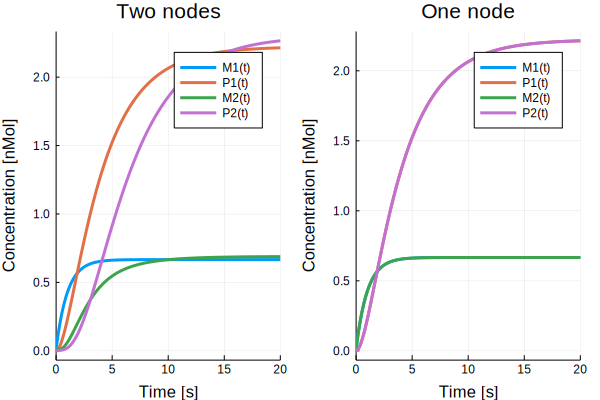

In [3]:
tspan = (0.0,20.0)
n=1
k_M=1
K=1
D=1
α_M=k_M*D
γ_M=1
α_P=1
γ_P2P1=1
γ_P=0.3
T=2

p=[α_M,γ_M,T,n,α_P,γ_P,K];
u₀ = [0.01,0.00001,0.01,0.00001]

prob1 = ODEProblem(TwoGenes!,u₀,tspan,p)
sol1 = solve(prob1)
P1=plot(sol1)
title!("Two nodes")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

prob2 = ODEProblem(OneGene!,u₀,tspan,p)
sol2 = solve(prob2)
P2=plot(sol2)
title!("One node")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

plot(P1,P2, layout=(1,2),legend=true)

Two genes are equivalent to one gene in the intensity and dynamics towards a steady state, but introduce a delay in the activation.

## A second activator results in reduced noise transmision from the input to output

In [4]:
NoiseFunction! = @ode_def negFB begin
   dM1 = 0.3
   dP1 = 0
   dM2 = 0
   dP2 = 0
    end α_M γ_M T n α_P γ_P K

(::negFB{getfield(Main, Symbol("##19#23")),getfield(Main, Symbol("##20#24")),getfield(Main, Symbol("##21#25")),Nothing,Nothing,getfield(Main, Symbol("##22#26")),Expr,Expr}) (generic function with 2 methods)

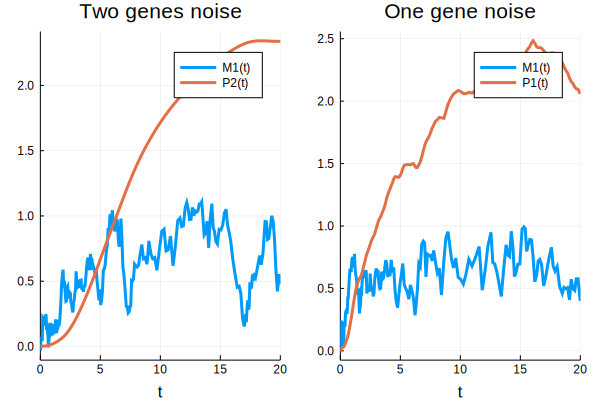

In [5]:
prob6 = SDEProblem(TwoGenes!,NoiseFunction!,u₀,tspan,p)
sol6 = solve(prob6)
P1=plot(sol6,vars=[1,4])
title!("Two genes noise")

prob7 = SDEProblem(OneGene!,NoiseFunction!,u₀,tspan,p)
sol7 = solve(prob7)
P2=plot(sol7,vars=[1,2])
title!("One gene noise")

plot(P1,P2,layout=(1,2),legend=true)

we can clearly see that a noisy signal is buffered in a network of two genes, compared to the putput of the network of one gene.

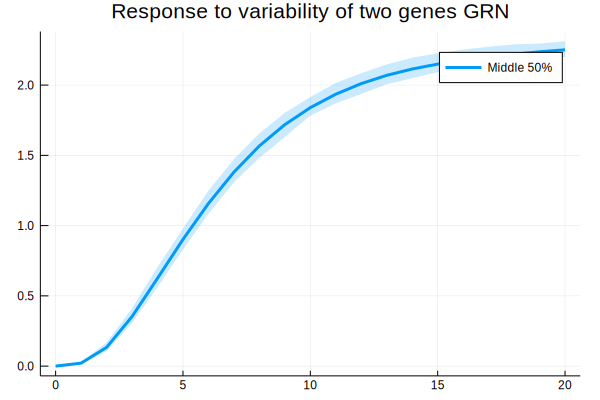

In [6]:
prob8 = MonteCarloProblem(prob6)
sol8 = solve(prob8,num_monte=100,parallel_type=:threads);
#summ8 = MonteCarloSummary(sol8,0:1:20)
#plot(summ8,labels="Middle 95%")
summ9 = MonteCarloSummary(sol8,0:1:20;quantiles=[0.25,0.75])
plot(summ9,idxs=4,labels="Middle 50%",legend=true)
title!("Response to variability of two genes GRN")

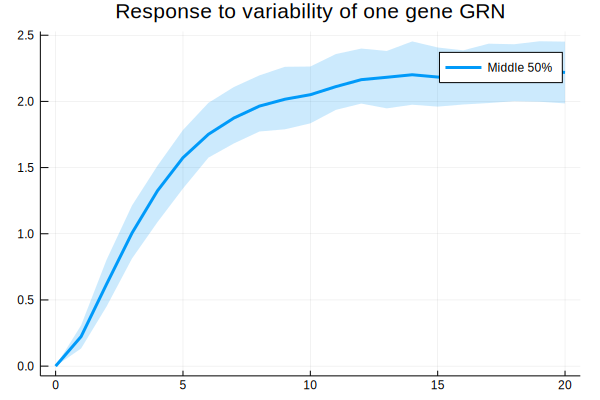

In [7]:
prob8 = MonteCarloProblem(prob7)
sol8 = solve(prob8,num_monte=100,parallel_type=:threads);
#summ8 = MonteCarloSummary(sol8,0:1:20)
#plot(summ8,labels="Middle 95%")
summ9 = MonteCarloSummary(sol8,0:1:20;quantiles=[0.25,0.75])
plot(summ9,idxs=2,labels="Middle 50%",legend=true)
title!("Response to variability of one gene GRN")

## Conclusions

The systems composed of a linear cascade of two genes where the first is an activator of the second some interesting properties compared to a system of one gene with the same kinetic constants:

- It does not affect output intenstity. 
- It introduces delay between input and output (similarly to positive feedback loops with cooperativity). 
- It buffers variations in the intensity of input (similarly to negative feedback loops).
- it buffers variability and noise (similarly to negative feedback loops).

## A linear cascade of repression does not change oputput amplitude but introducess a pulse

In [8]:
TwoGenes_repressor! = @ode_def ab begin
   dM1 = -γ_M*M1+α_M*T^n/(K^n +T^n)
   dP1 =   α_P * M1 - γ_P * P1 
   dM2 = -γ_M*M2+ α_M*K^n/(K^n +P1^n)
   dP2 =   α_P * M2 - γ_P * P2 
    end α_M γ_M T n α_P γ_P K

OneGene_repressor! = @ode_def ab begin
   dM1 = -γ_M*M1+α_M*K^n/(K^n +T^n)
   dP1 =   α_P * M1 - γ_P * P1 
   dM2 = -γ_M*M2+ α_M*K^n/(K^n +T^n)
   dP2 =   α_P * M2 - γ_P * P2 
    end α_M γ_M T n α_P γ_P K

(::ab{getfield(Main, Symbol("##35#39")),getfield(Main, Symbol("##36#40")),getfield(Main, Symbol("##37#41")),Nothing,Nothing,getfield(Main, Symbol("##38#42")),Expr,Expr}) (generic function with 2 methods)

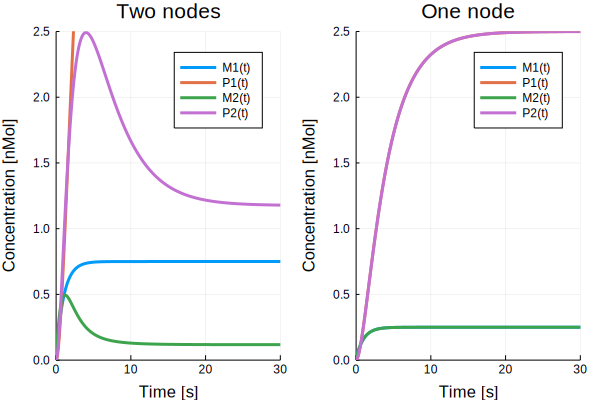

In [9]:
tspan = (0.0,30.0)
n=1
k_M=1
K=1
D=1
α_M=k_M*D
γ_M=1
α_P=3
γ_P=0.3
T=3

p=[α_M,γ_M,T,n,α_P,γ_P,K];
u₀ = [0.01,0.00001,0.01,0.00001]

prob1 = ODEProblem(TwoGenes_repressor!,u₀,tspan,p)
sol1 = solve(prob1)
P1=plot(sol1,ylims = (0,2.5))
title!("Two nodes")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

prob2 = ODEProblem(OneGene_repressor!,u₀,tspan,p)
sol2 = solve(prob2)
P2=plot(sol2,ylims = (0,2.5))
title!("One node")
xlabel!("Time [s]")
ylabel!("Concentration [nMol]")

plot(P1,P2, layout=(1,2),legend=true)

## A linear cascade of repression buffers changes in input

## A linear cascade of two repressors also buffers noise

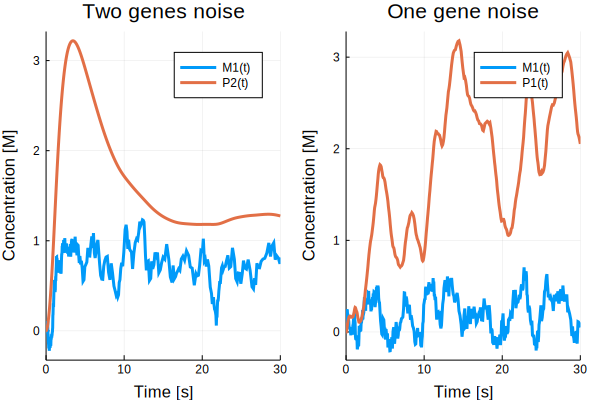

In [10]:
prob6 = SDEProblem(TwoGenes_repressor!,NoiseFunction!,u₀,tspan,p)
sol6 = solve(prob6)
P1=plot(sol6,vars=[1,4])
title!("Two genes noise")
xlabel!("Time [s]")
 ylabel!("Concentration [M]")

prob7 = SDEProblem(OneGene_repressor!,NoiseFunction!,u₀,tspan,p)
sol7 = solve(prob7)
P2=plot(sol7,vars=[1,2])
title!("One gene noise")
 xlabel!("Time [s]")
 ylabel!("Concentration [M]")

plot(P1,P2,layout=(1,2),legend=true)

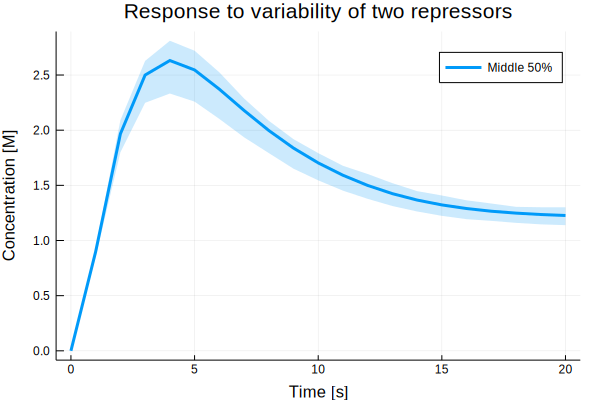

In [11]:
prob8 = MonteCarloProblem(prob6)
sol8 = solve(prob8,num_monte=100,parallel_type=:threads);
#summ8 = MonteCarloSummary(sol8,0:1:20)
#plot(summ8,labels="Middle 95%")
summ9 = MonteCarloSummary(sol8,0:1:20;quantiles=[0.25,0.75])
plot(summ9,idxs=4,labels="Middle 50%",legend=true)
title!("Response to variability of two repressors")
xlabel!("Time [s]")
 ylabel!("Concentration [M]")

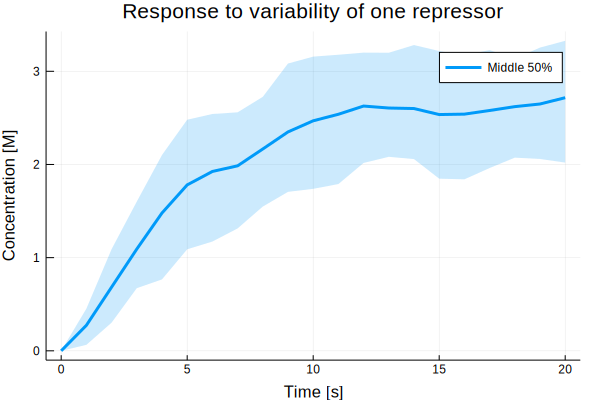

In [12]:
prob8 = MonteCarloProblem(prob7)
sol8 = solve(prob8,num_monte=100,parallel_type=:threads);
#summ8 = MonteCarloSummary(sol8,0:1:20)
#plot(summ8,labels="Middle 95%")
summ9 = MonteCarloSummary(sol8,0:1:20;quantiles=[0.25,0.75])
plot(summ9,idxs=2,labels="Middle 50%",legend=true)
title!("Response to variability of one repressor")
xlabel!("Time [s]")
 ylabel!("Concentration [M]")

## Conclusions

The systems composed of a linear cascade of two genes adds some intersteing properties to a signaling cascade:

- It does not affect the ratio input-output 
- It does not affect the signal-to-noise ratio
- A cascade of activators introduces a delay (like a positive feedback with cooperativity)
- A cascade or repression introdiuces a pulse (like a negative feedback with cooperativity)